# MLP

Derivative 微分:  
定義微分公式：$ \frac{df(x)}{dx} =\lim\limits_{h\to 0} \frac{(f(x+h) - f(x))}{h}$  
定義偏微分公式：$ \frac{df(x_i)}{dx_a} =\lim\limits_{h\to 0} \frac{f(x_1,\,\cdots\,x_a\,+\,h,\,x_{a+1},\,\cdots\,x_n)\,-\,f(x_1\,\cdots\,x_n)}{h} $  
#### Gradient:  
$\nabla f({x_1},{x_2},{x_3},\,\ldots) = \frac{\partial f}{\partial {x_1}}i+ \frac{\partial f}{\partial {x_2}}j+ \frac{\partial f}{\partial {x_3}}k \cdots$  
#### Loss:  

常用的$loss:\,Mean\,Square\,Error\,(MSE)$ <br>
$MSE\,=\,\frac{1}{n} \displaystyle\sum_{i=1}^{n} (Y_i-\hat{Y_i})^2$  
對於$\hat y = wx$(不考慮bias), 設計loss function如下:  
$f\,=\,\frac{1}{2n} \displaystyle\sum_{i=1}^{n} (Y_i-XW)^2$



In [3]:
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.datasets import make_blobs
import matplotlib.pyplot as plt
np.random.seed(123)

%matplotlib inline

In [4]:
from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
Y = Y.reshape(len(Y), 1)
names = iris.target_names

# Train valid test split

X_train = np.vstack([X[0:40], X[50:90], X[100:140]])
X_valid = np.vstack([X[40:45], X[90:95], X[140:145]])
X_test = np.vstack([X[45:50], X[95:100], X[145:150]])

Y_train = np.vstack([Y[0:40], Y[50:90], Y[100:140]])
Y_valid = np.vstack([Y[40:45], Y[90:95], Y[140:145]])
Y_test = np.vstack([Y[45:50], Y[95:100], Y[145:150]])

def derivative(f, x, epsilon=0.1):
    # f is our function, and x is our variable
    h = epsilon
    return (f(x+h) - f(x)) / h

def partial_derivative(f, X, i,epsilon=1e-6):
    # f is our function, and i is simply the index which we are 
    # excuting our partial derivative    
    H = X.copy()
    h = epsilon
    H[i] = X[i] + h
    return (f(H) - f(X)) / h    

def gradient(f, X):
    grad = []
    for i in range(len(X)):
        grad.append(partial_derivative(f, X, i))
    return grad

def MSE(true, pred):
    MSE = 0
    for i in range(len(true)):
        MSE += (true[i]-pred[i])**2
    return MSE/len(true)

def loss_function(W, data=X_train, target=Y_train):
    #矩陣相乘
    Z = np.dot(data, W)
    f = MSE(target, Z)/2
    return f

def gradient_descent(X_train, Y_train, X_valid, Y_valid, W, alpha, num_iters):
    m = len(Y_train)
    train_loss = np.zeros((num_iters, 1))
    valid_loss = np.zeros((num_iters, 1))
    
    for i in range(num_iters):
        # function代W求維分
        delta = gradient(loss_function, W)
        delta = np.array(delta)
        W -= alpha*delta
        
        train_loss[i] = MSE(Y_train, np.dot(X_train, W))
        valid_loss[i] = MSE(Y_valid, np.dot(X_valid, W))
        
        if i%10 == 0:
            print('The training loss of the', i+1, 'epoch is', train_loss[i][0].round(4), 
                  ', and the validation loss of the', i+1, 'epoch is', valid_loss[i][0].round(4))
    return W, train_loss, valid_loss

np.random.seed(37)
W = np.random.random((4,1))
W, train_loss, valid_loss = gradient_descent(X_train, Y_train, X_valid, Y_valid, W, 0.03, 100)

The training loss of the 1 epoch is 42.1148 , and the validation loss of the 1 epoch is 39.4722
The training loss of the 11 epoch is 2.715 , and the validation loss of the 11 epoch is 2.4563
The training loss of the 21 epoch is 0.2498 , and the validation loss of the 21 epoch is 0.1886
The training loss of the 31 epoch is 0.0764 , and the validation loss of the 31 epoch is 0.0403
The training loss of the 41 epoch is 0.0593 , and the validation loss of the 41 epoch is 0.027
The training loss of the 51 epoch is 0.0565 , and the validation loss of the 51 epoch is 0.0244
The training loss of the 61 epoch is 0.0557 , and the validation loss of the 61 epoch is 0.0234
The training loss of the 71 epoch is 0.0554 , and the validation loss of the 71 epoch is 0.0229
The training loss of the 81 epoch is 0.0553 , and the validation loss of the 81 epoch is 0.0227
The training loss of the 91 epoch is 0.0551 , and the validation loss of the 91 epoch is 0.0225


In [5]:
#輸出預測結果
predict = np.dot(X_test, W).round()
print('The MSE score of our prediction is ', MSE(Y_test, predict)[0])

The MSE score of our prediction is  0.0


### Sigmoid (AKA logistic regression)
用來把資料壓縮到0跟1之間的函數  
$ Z(x_i) = \frac{1}{1+e^{-x_i}}$  
Sigmoid Gradient:  
$ \frac{d}{dx} Z(x_i) = Z(x_i) \times (1-Z(x_i))$  

### Softmax (AKA normalized exponential function):  
與 Sigmoid 有點類似 <br>
不過 Softmax 是針對一整組數字做壓縮 <br>
而 Sigmoid 是直接對單一的數值做壓縮  
$\sigma(\mathbf{x})_j = \frac{e^{x_j}}{\sum_{i=1}^K e^{x_i}}\,for\,j\,\in\,1,\,\ldots\,,\,K$  

For example:<br>
如果我們有一組數列 $1,\,3,\,5$ <br>
Softmax 會回傳 $0.016,\,0.117,\,0.867$

<hr>

In [5]:
def sigmoid(X):
    output = 1 / (1 + np.exp(-X)) 
    return output
def sigmoid_gradient(X):
    output = sigmoid(X)*(1-sigmoid(X))
    return output
def softmax(X): 
    #np.sum()可以使用keepdims讓維度(R,)變(R,1)
    return np.exp(X) / np.sum(np.exp(X), axis=1, keepdims=True)


## Cross entropy (Multiclass下)  
$H(p,q)=-\displaystyle\sum _{i=1}^m  p(x_i)\,\log q(x_i).\!$  
>假設我們的實際值為0，預測值為0.1的話  
>$-\sum_{x_i}p(x_{i})\,\log q(x_{i})=0\times \log 0.1 +(1-0) \times \log (1-0.1) = 0.105$  
>假設我們的第一個Y值(實際值)為 \[1, 0, 0\]，預測值為 \[0.7, 0.2, 0.1\] 的話  
>$p(x_{0})\,\log q(x_{0})=1\times \log 0.7 + 0\times \log 0.2 + 0\times \log 0.1 \approx -0.357$

加epsilon避免log(0)發生  



In [6]:
# p , q is list
def cross_entropy(p, q):
    epsilon = 1e-15
    H = 0
    for i in range(len(p)):
        # epsilon avoid 0
        H += -p[i]*np.log(q[i]+epsilon)       
    H = H.sum()/p.shape[0]
    return H

p = np.array([[1,0,0]])
q = np.array([[0.7, 0.2, 0.1]])
cross_entropy(p,q)


0.356674943938731

## One Hot Encoding

In [7]:
def one_hot_encoding(array):
    
    sorted_array = np.sort(array)
    count = 1
    #unique會將sorted_array重複部分去掉
    unique = [sorted_array[0]]
    
    temp = sorted_array[0]
    for i in range(len(array)):
        if sorted_array[i] != temp:
            count += 1
            temp = sorted_array[i]
            unique.append(temp)
    
    eye = np.zeros((len(unique), len(unique)))
    for i in range(len(unique)):
        eye[i, i] = 1
    #做出eye矩陣
    for i in range(len(array)):
        for j in range(len(unique)):
            if array[i] == unique[j]:
                #將array中的元素轉成eye矩陣的index索引
                array[i] = j
                break
    result = eye[array]
    return result

# Example.
one_hot_encoding(np.array([1,2,3,2]))

array([[1., 0., 0.],
       [0., 1., 0.],
       [0., 0., 1.],
       [0., 1., 0.]])

## 神經網路架構  

z = $w_1x_1+w_2x_2...+w_nx_n+b$  
a = $\hat y=\sigma(z)$

$w_{ij}^l$  指的是第l-1到l層中l層第i個neuron相對l-1層第j個neuron的邊  
$z_{i}^l$  指的是第l層中第i個neuron的z  
$a_{i}^l$  指的是第l層中第i個neuron的a  
$x_{j}$  指的是輸入層中第j個feature  





流程是  
Forward  
1. $layer_1 = X \times weight_1 $, 這裏X維度120x4, W1維度4X10, layer1有120x10維  
2. $activation_1 = activation(z_1)$, 這裏用sigmoid函數  
3. $layer_2 = a_1 \times weight_2$, 這裏a1維度120x10, W1維度10X3, 因為y被one hot encode成3維的標籤  
4. $prediction = activationo(z_2)$, 這裏用softmax壓縮到0跟1之間  
<br>   

Backward  
假設資料有R筆$(x^1,y^1),..,(x^r,x^r)..,(x^R,x^R)$  
令loss: $L(w) = \frac{1}{R}||\sum(f(x^r;w)-y^r)||$  
要更新$w_{ij}^l$需要求$\frac{\partial L^r}{\partial w_{ij}^l} :$  
$\frac{\partial L^r}{\partial w_{ij}^l}=\frac{\partial z_{ij}^l}{\partial w_{ij}^l}*\frac{\partial L^r}{\partial z_{ij}^l}$  
第1項$\frac{\partial z_{ij}^l}{\partial w_{ij}^l}$:  
> 對於輸入層:  
$z_{ij}^1 = w_{ij}^1x_j^r + b_i^1$,  $\frac{\partial z_{ij}^l}{\partial w_{ij}^l}=x_j^r$  
> 對於l-1到l層:  
$z_{ij}^l = w_{ij}^la_j^{l-1} + b_i^l$,  $\frac{\partial z_{ij}^l}{\partial w_{ij}^l}=a_j^{l-1}$ 

第2項$\frac{\partial L^r}{\partial z_{ij}^l}$: 
> 對於輸出層(第L層):  
> $\frac{\partial L^r}{\partial z_{ij}^L}= \frac{\partial L^r}{\partial y}\frac{\partial y}{\partial z{ij}^L}$, 以$loss=\frac{1}{2}(\hat y - y)^2, \frac{\partial L^r}{\partial y}=(\hat y - y)$, $\frac{\partial y}{\partial z{ij}^L}=\sigma'(z_{ij}^L)$, 這裏如果激發函數是sigmoid的話$\sigma'(z_{ij}^L)=\sigma(z_{ij}^L)(1-\sigma(z_{ij}^L))$   
> 以$loss=cross\,entropy(softmax(\hat y)), $微分=$(\hat y - y)$  
> 對於l-1到l層:  
> 令$\frac{\partial L^r}{\partial z_{ij}^l}=\delta_i^l = \sigma'(z_i^l)\sum_kw_{ki}^{l+1}\delta_k^{l+1}$

$\frac{\partial L^r}{\partial b_i^l}$, 也是一樣的方式計算  


1. $derivative\,of\,layer_2 = prediction - true\,value$, 算出預測值與實際值誤差,d2維度120x3  
1. 剛好cross entropy 加上 softmax 後的微分, 就是prediction - true\,value  
1. $derivative\,of\,weight_2  = activation_1\times derivative\,of\,layer_2$, a1維度120x10, d2維度120x3 dw2=a1.Txd2維度10x3   
1. $derivative\,of\,layer_1 = derivative\,of\,layer_2\times weight_2\times gradient\,of\,activation_1$, 
1. $derivative\,of\,weight_1  = X\times derivative\,of\,layer_1$  


### 假設只有兩層的網路:  
Forward: 先求出w,z,a,$\hat y$  
1. $z1=w_1^1x_1+w_2^1x_2+..= X*w1$    
1. $a1=\sigma(z1)=sigmoid(z1)$  
1. $z2=w_1^2a_1+w_2^2a_2+..= a1*w2$  
1. $\hat y=\sigma(z2)=softmax(z2)$  
1. 定義Loss Function:$L^r=J(\theta)=$Cross Entropy($\hat y,y$)  

Backward: 求出$\frac{\partial L^r}{\partial w_{ij}^l}$  
1. 先求$\delta^2$: 對於輸出層softmax加上Loss使用cross entropy, d2=$\delta_i^2$=$\frac{\partial L^r}{\partial z_{i}^2}=(\hat y_i - y_i)$   
1. $w^2$的微分$\frac{\partial L^r}{\partial w_{ij}^2}=\frac{\partial L^r}{\partial z_{i}^2}\frac{\partial z_i^2}{\partial w_{ij}^2}= (\hat y_i - y_i)a_i^1$, 所以 $dw2=a1^T * d2$   
1. 接著求$\delta^1$: d1=$\frac{\partial L^r}{\partial z_{i}^1}=\delta_i^1 = \sigma'(z_i^1)\sum_kw_{ki}^2\delta_i^2$
$=\sigma'(z_i^1) ( d2*{w^2}^T )$
1. $w^1$的微分$\frac{\partial L^r}{\partial w_{ij}^1}=\frac{\partial L^r}{\partial z_{i}^1}\frac{\partial z_i^1}{\partial w_{ij}^1}$, 所以dw1$=X^T*d1$

這邊簡化問題沒有加上bias

In [8]:
def two_layer_net(X, Y, W1, W2):
    #X[0]=第一筆訓練樣本, W1
    #Forward
    # z1每筆輸入4維資料輸出向量10維的資料, 共120筆, 所以z1維度120x10
    z1 = np.dot(X,W1)
    #將每筆資料壓縮本身到0,1之間
    a1 = sigmoid(z1)
    # z2每筆輸入10維資料輸出向量3維的資料, 共120筆, 所以z2維度120x3
    z2 = np.dot(a1, W2)
    #將所有資料壓縮到0,1之間
    out = softmax(z2)
    
    

from sklearn import datasets
iris = datasets.load_iris()
X = iris.data
Y = iris.target
#Y被encode成3維
Y = one_hot_encoding(Y)
names = iris.target_names

X_train = np.vstack([X[0:40], X[50:90], X[100:140]])
X_valid = np.vstack([X[40:45], X[90:95], X[140:145]])
X_test = np.vstack([X[45:50], X[95:100], X[145:150]])

Y_train = np.vstack([Y[0:40], Y[50:90], Y[100:140]])
Y_valid = np.vstack([Y[40:45], Y[90:95], Y[140:145]])
Y_test = np.vstack([Y[45:50], Y[95:100], Y[145:150]])
#----------------------------------------------------
iteration = 1000
alpha = 0.01
history_train = np.zeros((iteration, 1))
history_valid = np.zeros((iteration, 1))

np.random.seed(37)
#X有4維, W1有4x10, 表示L1有10個node
W1 = np.random.randn(4,10)
#表示L2有3個node
W2 = np.random.randn(10,3)
print(X_train.shape)
# nx4 dot 4x10 = nx10
z = np.dot(X_train,W1)
print(z.shape)
# z1=120x10
z1 = np.dot(X_train,W1)
a1 = sigmoid(z1)
# z2 = 120*10 dot 10x3
z2 = np.dot(a1, W2) 
print(a1.shape)
z2 = np.dot(a1, W2)
print(z2.shape)
out = softmax(z2)
d2 = out - Y_train
print(sigmoid_gradient(a1).shape)
d1 = np.matmul(d2, (W2.T))*sigmoid_gradient(a1)
print(d1.shape)

(120, 4)
(120, 10)
(120, 10)
(120, 3)
(120, 10)
(120, 10)


### 參考 https://github.com/zotroneneis/machine_learning_basics/blob/master/simple_neural_net.ipynb  

建立一個input層個數2,hidden層個數6,output層個數1的網路  
可以知道Wh維度2x6  
Bh維度1x6  
Wo維度6x1  
Bo維度1x1  

我們選定hidden層使用的activation是$tanh(x) = \frac{sinh(x)}{cosh(x)}=\frac{e^x-e^{-x}}{e^x+e^{-x}}$  
微分完$tanh'(x) = 1 - tanh^2(x)$  
output層使用使用的activation是$sigmoid(x) = \sigma(x)= \frac{1}{1+e^{-x}}$  
微分完$\sigma'(x) = \sigma(x)(1-\sigma(x))$  



1. forward得到($z_h,a_h,z_o,a_o$)  
$z_h$是hidden層激發函數的輸入, $a_h$是hidden層輸出  
$z_o$是output層激發函數的輸入, $a_o$是output層輸出  

1. 計算loss

1. backward透過X,y跟forward的結果得到($dW_h,db_h,dW_o,db_o$)  
1. 用$dW_h,db_h,dW_o,db_o$更新$W_h,b_h,W_o,b_o$  

對於$\delta_o$  
$\frac{\partial Loss}{\partial z_o} = \frac{\partial Loss}{\partial a_o}\frac{\partial a_o}{\partial z_o}$  
如果$Loss = \frac{1}{2m}(\hat y - y)^2$  
$\frac{\partial Loss}{\partial z_o} = (\hat y - y) * \sigma'(z_o) = (\hat y - y) * [(a_o)(1-a_o)]$

如果$Loss = \frac{1}{m}\sum_{i=1}^m[y^{(i)}log(\hat y^{(i)}) + (1-y^{(i)})(1-log(\hat y^{(i)}))]$  
$\frac{\partial Loss}{\partial z_o} = (\hat y - y)$  
令$dz_o = \frac{\partial Loss}{\partial z_o}$  
對於  
$dW_o = \frac{\partial Loss}{\partial W_o} = \frac{\partial Loss}{\partial z_o}\frac{\partial z_o}{\partial W_o} = \frac{1}{m}a_h^T * dz_o$  
對於  
$db_o =  設a_h \to 1, \frac{1}{m}a_h^T * dz_o = \sum{dz_o}$

對於$\delta_h$  
由於hidden層使用tanh()    
$\frac{\partial Loss}{\partial z_h} = [\sum_k w_k \delta_k] \frac{\partial a_h}{\partial z_h} = dz_o * W_o^T * (1-tanh^2{(z_h)}) = dz_o * W_o^T * (1-a_h^2) $  
令$dz_h = dz_o * W_o^T * (1-a_h^2)$
對於  
$dW_h = \frac{\partial Loss}{\partial z_h}\frac{\partial z?h}{\partial W_h} = \frac{1}{m}X^T * dz_h$  
對於  
$db_h =  設X \to 1, \frac{1}{m}X^T * dz_h = \sum{dz_h}$




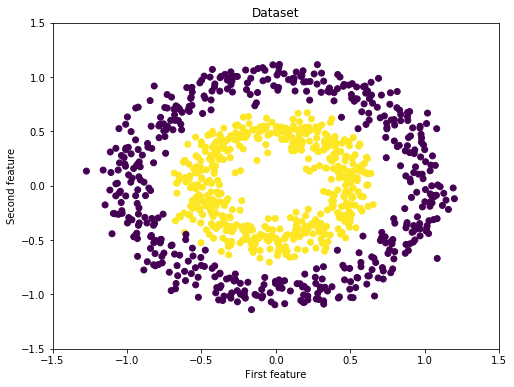

In [70]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets import make_circles
from sklearn.model_selection import train_test_split
np.random.seed(123)

%matplotlib inline

X, y = make_circles(n_samples=1000, factor=0.5, noise=.1)
# 注意要加一個維度
y_true = y[:, np.newaxis]
fig = plt.figure(figsize=(8,6))
plt.scatter(X[:,0], X[:,1], c=y)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.title("Dataset")
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.show()

### MLP

對於input層到hidden層:  
假設input層有n個維度表示有n個節點  
hidden層有m個節點  
$net_h=XW_h+b_h$, 其中X維度1xn, $W_h$維度n X m, $b_h$維度1 X m  
對於output層有p維  
$net_o=net_hW_o+b_o$, 其中$net_h$維度1xm, $W_o$維度m X p, $b_o$維度1xp


In [127]:
class MLP():
    def __init__(self, n_inputs, n_outputs, n_hidden):
        self.n_inputs = n_inputs
        self.n_outputs = n_outputs
        self.n_hidden = n_hidden
        self.W_h = np.random.randn(self.n_inputs, self.n_hidden)
        self.b_h = np.zeros((1, self.n_hidden))
        self.W_o = np.random.randn(self.n_hidden, self.n_outputs)
        self.b_o = np.zeros((1, self.n_outputs))
    def sigmoid(self,a):
        return 1. / (1 + np.exp(-a))
    def loss_function(self, y_true, y_predict):
        loss = (-1/len(y_true)) * np.sum(y_true * np.log(y_predict)+(1-y_true)*(np.log(1-y_predict)))
        loss = np.squeeze(loss)
        assert isinstance(loss, float)
        return loss
    def hidden_activation(self,data):
        # hidden層的activation使用tanh函數
        return np.tanh(data)
    def forward(self, dataX):
        z_h = np.dot(dataX, self.W_h) + self.b_h
        a_h = self.hidden_activation(z_h)
        z_o = np.dot(a_h, self.W_o) + self.b_o
        a_o = self.sigmoid(z_o)
        result = {
                "z_h": z_h,
                "z_o": z_o,
                "a_h": a_h,
                "a_o": a_o,
                }
        return result
    def backward(self, dataX, datay,forward_result):
        n_samples = len(dataX)
        #dz_o = (forward_result['a_o'] - datay)
        dz_o = (forward_result['a_o'] - datay)*(forward_result['a_o']*(1-forward_result['a_o']))
        dW_o = (1 / n_samples) * np.dot(forward_result['a_h'].T, dz_o)
        db_o =  (1 / n_samples) * np.sum(dz_o)
        # tanh'() = 1 - tanh()平方
        dz_h =  np.dot(dz_o,self.W_o.T)*(1 - np.power(forward_result["a_h"], 2))
        dW_h =  (1 / n_samples)*np.dot(dataX.T,dz_h)
        db_h =  (1 / n_samples)*np.sum(dz_h)
        result = {
                "dW_o": dW_o,
                "db_o": db_o,
                "dW_h": dW_h,
                "db_h": db_h,
                }
        return result
    def updateWeight(self, backward_result, learning_rate=0.3):
        self.W_h -= learning_rate * backward_result['dW_h']
        self.b_h -= learning_rate * backward_result['db_h']
        self.W_o -= learning_rate * backward_result['dW_o']
        self.b_o -= learning_rate * backward_result['db_o']  
        pass
    def train(self, X, y, n_iters=500, learning_rate=0.3):
        n_samples, _ = X.shape
        for i in range(n_iters):
            ret = self.forward(X)
            loss = self.loss_function(y_true=y,y_predict=ret['a_o'])
            gradient =  self.backward(X,y,ret)
            self.updateWeight(gradient)
            if i % 200 == 0:
                print(f'Cost at iteration {i}: {np.round(loss, 4)}')
    def predict(self, testx):
        ret = self.forward(testx)
        # set > 0.5 is 1
        predicted = [1 if elem >= 0.5 else 0 for elem in ret['a_o']]
        return np.array(predicted)[:, np.newaxis]
    
nn = MLP(2,1,6)
nn.train(X,y_true,n_iters=800)


Cost at iteration 0: 0.8864
Cost at iteration 200: 0.6902
Cost at iteration 400: 0.6578
Cost at iteration 600: 0.6034


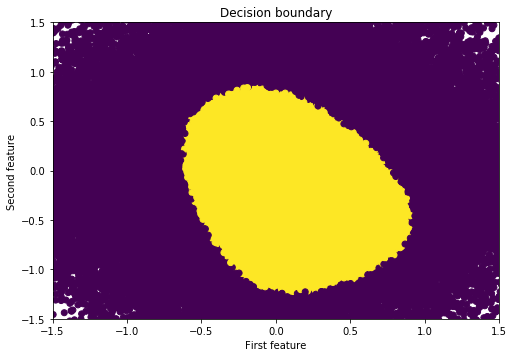

In [128]:
X_temp, y_temp = make_circles(n_samples=60000, noise=.5)
y_predict_temp = nn.predict(X_temp)
#從(60000,1)降回(60000,)
y_predict_temp = np.ravel(y_predict_temp)
fig = plt.figure(figsize=(8,12))
ax = fig.add_subplot(2,1,1)
#ax = fig.add_subplot(2,1,2)
plt.scatter(X_temp[:,0], X_temp[:,1], c=y_predict_temp)
plt.xlim([-1.5, 1.5])
plt.ylim([-1.5, 1.5])
plt.xlabel("First feature")
plt.ylabel("Second feature")
plt.title("Decision boundary")
plt.show()